# Time Series Forecasting

A TS is said to be stationary if its statistical properties such as mean, variance remain constant over time. But why is it important? Most of the TS models work on the assumption that the TS is stationary. Intuitively, we can sat that if a TS has a particular behaviour over time, there is a very high probability that it will follow the same in the future. Also, the theories related to stationary series are more mature and easier to implement as compared to non-stationary series.

Stationarity is defined using very strict criterion. However, for practical purposes we can assume the series to be stationary if it has constant statistical properties over time, ie. the following:

1-constant mean
2-constant variance
3-an autocovariance that does not depend on time.

It is clearly evident that there is an overall increasing trend in the data along with some seasonal variations. However, it might not always be possible to make such visual inferences (we’ll see such cases later). So, more formally, we can check stationarity using the following:

Plotting Rolling Statistics: We can plot the moving average or moving variance and see if it varies with time. By moving average/variance I mean that at any instant ‘t’, we’ll take the average/variance of the last year, i.e. last 12 months. But again this is more of a visual technique.


Dickey-Fuller Test: This is one of the statistical tests for checking stationarity. Here the null hypothesis is that the TS is non-stationary. The test results comprise of a Test Statistic and some Critical Values for difference confidence levels. If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series is stationary.

The Augmented Dickey-Fuller test is a type of statistical test called a unit root test.
The intuition behind a unit root test is that it determines how strongly a time series is defined by a trend.
The null hypothesis of the test is that the time series is not stationary (has some time-dependent structure). The alternate hypothesis (rejecting the null hypothesis) is that the time series is stationary.
We interpret this result using the p-value from the test. A p-value below a threshold (such as 5% or 1%) suggests we reject the null hypothesis (stationary), otherwise a p-value above the threshold suggests we accept the null hypothesis (non-stationary).

p-value > 0.05: Accept the null hypothesis (H0), the data has a unit root and is non-stationary.

p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

source- https://machinelearningmastery.com/time-series-data-stationary-python/

### 1- Daily minimum temprature in Melobourne dataset:

In [1]:
from pandas import Series
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
series = Series.from_csv('daily-minimum-temperatures.csv', header=0,sep=';')
Temp=series.base[0]
dates = pd.date_range('1/1/1981', periods=len(Temp))
series= Series(Temp,dates)
series.head()

C:\Anacounda\lib\site-packages\pandas\core\series.py:2849: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
Freq: D, dtype: float64

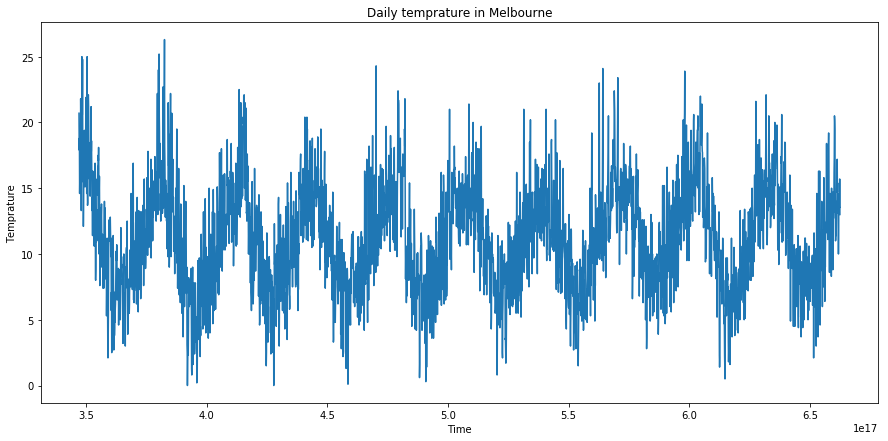

In [3]:
df_daily = pd.DataFrame(Temp)
fig = plt.figure(figsize=(15,7))
plt.xlabel('Time')
plt.ylabel('Temprature')
plt.title("Daily temprature in Melbourne")
plt.plot(dates,Temp)  
plt.show()

# Stationary Assumption

### Hist Visualization

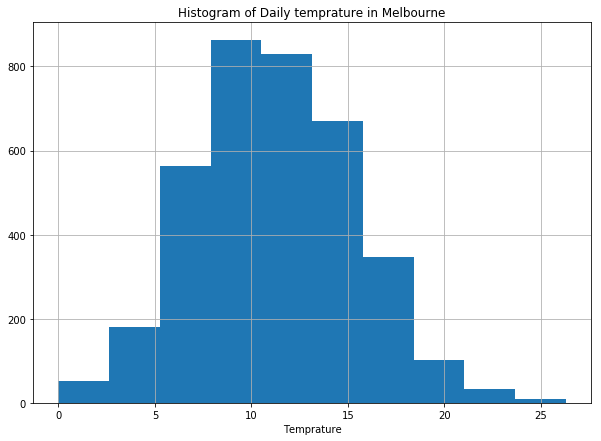

In [4]:
plt.figure(figsize=(10,7))
series.hist()
plt.xlabel('Temprature')
plt.title("Histogram of Daily temprature in Melbourne")
plt.show()

## As we can see this time series dataset is stationary. I want check the variance and mean in 3 different time period to confirm the stationary.

In [5]:
step = len(Temp) // 3
temprature = pd.to_numeric(Temp, errors='coerce')
G1, G2 , G3 = temprature[0:step], temprature[step:2*step] ,temprature[2*step:3*step-1]
mean1, mean2, mean3 = G1.mean(), G2.mean() , G3.mean()
var1, var2, var3 = G1.var(), G2.var() , G3.var()
print('mean1=%f, mean2=%f, mean3=%f' % (mean1, mean2, mean3))
print('variance1=%f, variance2=%f, variance3=%f' % (var1, var2, var3))

mean1=11.368447, mean2=10.527445, mean3=11.637747
variance1=19.010820, variance2=14.521778, variance3=15.521791


# Dickey fuller test:

p-value > 0.05: Accept the null hypothesis (H0), the data has a unit root and is non-stationary.

p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.


In [6]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(Temp)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

C:\Anacounda\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


ADF Statistic: nan
p-value: nan
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


C:\Anacounda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Anacounda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Anacounda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1735: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= self.b) & cond0


The p-value is less than 0.05, so it is stationary.

# Plotting rolling average and rolling std :


C:\Anacounda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version
  """Entry point for launching an IPython kernel.
C:\Anacounda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pd.rolling_std is deprecated for ndarrays and will be removed in a future version
  


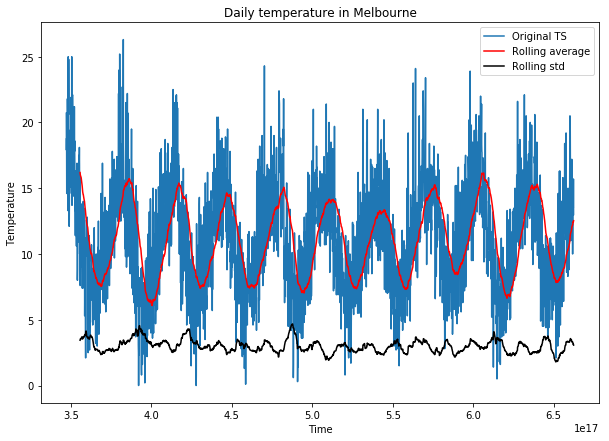

In [7]:
rolling_mean = pd.rolling_mean(Temp,window=100)
rolling_std = pd.rolling_std(Temp,window=100)
# rolling_mean
fig = plt.figure(figsize=(10,7))
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title("Daily temperature in Melbourne")
plt.plot(dates,Temp,label= "Original TS")  
plt.plot(dates,rolling_mean,'r-',label= "Rolling average")
plt.plot(dates,rolling_std,'k-',label= "Rolling std")
plt.legend()
plt.show()

Lest Merge Everything into Stationary_check function

In [8]:
def stationary_check(time_series,time_line):
    a=time_series.base[0]
    dates=time_line
    df_daily = pd.DataFrame(a)
    fig = plt.figure(figsize=(10,7))
    plt.xlabel('Time')
    plt.ylabel('Temprature')
    plt.title("Daily temprature in Melbourne")
    plt.plot(dates,a)  
    plt.show()
    time_series.hist()
    plt.xlabel('Temprature')
    plt.title("Daily temprature in Melbourne")
    plt.show()
    step = len(df_daily) // 3
    G1, G2,G3 = df_daily[0:step], df_daily[step:2*step],df_daily[2*step:3*step-1]
    mean1, mean2,mean3 = G1.mean(), G2.mean(),G3.mean()
    var1, var2,var3 = G1.var(), G2.var(),G3.var()
    print("Statistical Analysis results:")
    print('mean1=%f, mean2=%f,mean3=%f' % (mean1, mean2,mean3))
    print('variance1=%f, variance2=%f,variance3=%f' % (var1, var2,var3))
    result = adfuller(series.values)
    print("AG Dicky Fuller hypothesis test results :")
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    rolling_mean = pd.rolling_mean(df_daily,window=100)
    rolling_std = pd.rolling_std(df_daily,window=100)
    # rolling_mean
    fig = plt.figure(figsize=(10,7))
    plt.xlabel('time')
    plt.ylabel('Temperature')
    plt.title("Daily temperature in melbourne")
    plt.plot(dates,a,label= "Original time series")  
    plt.plot(dates,rolling_mean,'r-',label= "Rolling average")
    plt.plot(dates,rolling_std,'b-',label= "Rolling std")
    plt.legend()
    plt.show()

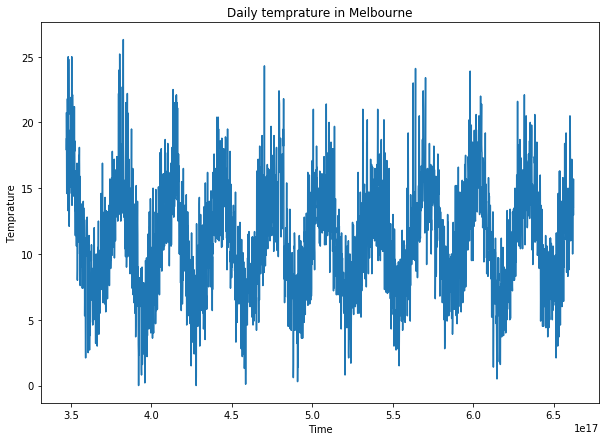

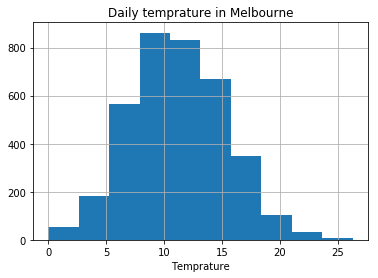

Statistical Analysis results:
mean1=11.368447, mean2=10.527445,mean3=11.637747
variance1=19.026454, variance2=14.533720,variance3=15.534566


C:\Anacounda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Anacounda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Anacounda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1735: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= self.b) & cond0
C:\Anacounda\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=100,center=False).mean()
C:\Anacounda\lib\site-packages\ipykernel_launcher.py:30: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=100,center=False).std()


AG Dicky Fuller hypothesis test results :
ADF Statistic: nan
p-value: nan
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


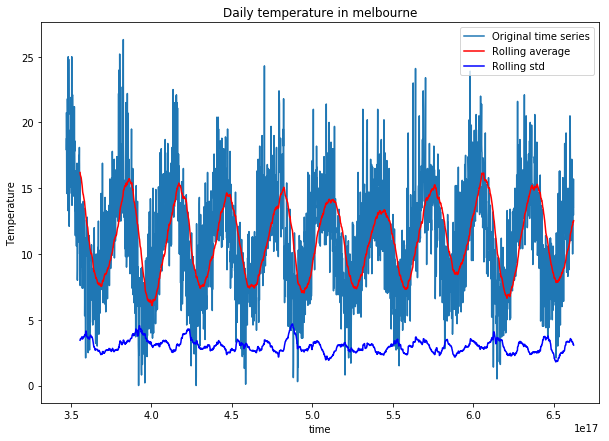

In [9]:
series = Series(Temp,dates) 
stationary_check(series,dates)

## 2- Airfare dataset:

In [10]:
series = Series.from_csv('AirPassengers.csv', header=0)
time_line = pd.date_range(start='1/1949',periods=len(series.base[0]),freq='MS')

C:\Anacounda\lib\site-packages\pandas\core\series.py:2849: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


In [11]:
def stationary_check(time_series,time_line):
    a=time_series.values
    dates=time_line
    df_daily = pd.DataFrame(a)
    fig = plt.figure(figsize=(10,7))
    plt.xlabel('time')
    plt.ylabel('Airfare')
    plt.title("Passenger airfare monthly")
    plt.plot(dates,a)  
    plt.show()
    plt.figure(figsize=(10,7))
    plt.hist(df_daily,rwidth=0.98)
    plt.xlabel('time')
    plt.ylabel('Airfare')
    plt.title("Passenger airfare monthly")
    plt.show()
    step = len(df_daily) // 3
    G1, G2,G3 = df_daily[0:step], df_daily[step:2*step],df_daily[2*step:3*step-1]
    mean1, mean2,mean3 = G1.mean(), G2.mean(),G3.mean()
    var1, var2,var3 = G1.var(), G2.var(),G3.var()
    print("Statistical Analysis results:")
    print('mean1=%f, mean2=%f,mean3=%f' % (mean1, mean2,mean3))
    print('variance1=%f, variance2=%f,variance3=%f' % (var1, var2,var3))
    
    result = adfuller(time_series.values)
    print("AG Dicky Fuller hypothesis test results :")

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    
    rolling_mean = pd.rolling_mean(df_daily,window=10)
    rolling_std = pd.rolling_std(df_daily,window=10)
    # rolling_mean
    fig = plt.figure(figsize=(10,7))
    plt.xlabel('time')
    plt.ylabel('Airfare')
    plt.title("Passenger airfare monthly")
    plt.plot(dates,a,label= "Original time series")  
    plt.plot(dates,rolling_mean,'ro',label= "Rolling average")
    plt.plot(dates,rolling_std,'go',label= "Rolling std")
    plt.legend()
    plt.show()

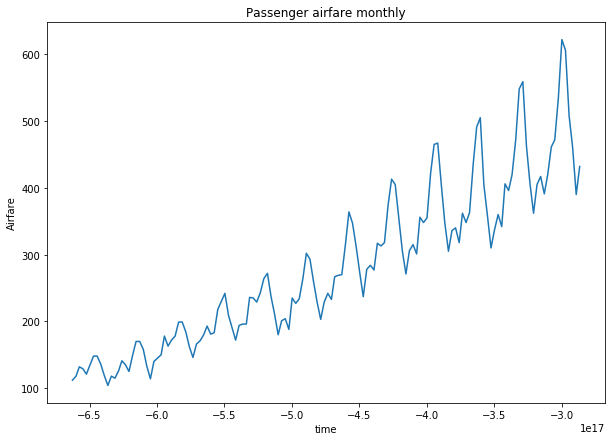

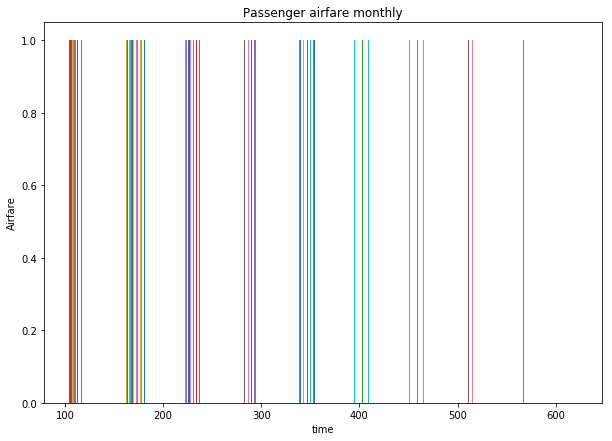

Statistical Analysis results:
mean1=158.375000, mean2=269.041667,mean3=413.085106
variance1=1094.664894, variance2=3105.998227,variance3=6288.340426
AG Dicky Fuller hypothesis test results :
ADF Statistic: 0.815369
p-value: 0.991880
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


C:\Anacounda\lib\site-packages\ipykernel_launcher.py:34: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=10,center=False).mean()
C:\Anacounda\lib\site-packages\ipykernel_launcher.py:35: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=10,center=False).std()


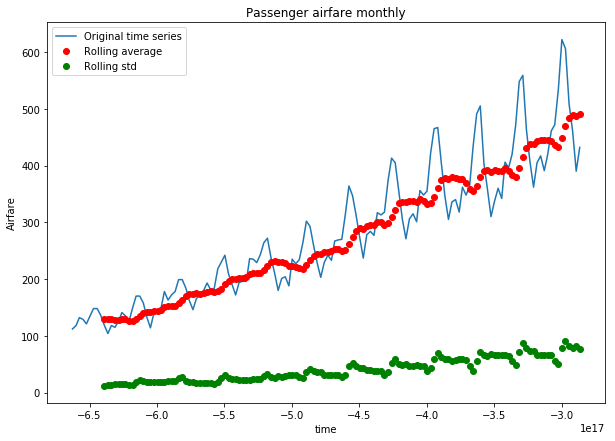

In [14]:
stationary_check(time_series=series,time_line=time_line)

As we can see the histogram deosn't have a gaussian curve so the time series could be non stationary. Furtheremore mean and variance are significantly different for three split from the dataset. Also the dicky fuller test shows the p-value more than 0.5 so the hypothesis that the time series contains a trend. 

### Logarithmic smoothing:

AG Dicky Fuller hypothesis test results :
ADF Statistic: -1.717017
p-value: 0.422367
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


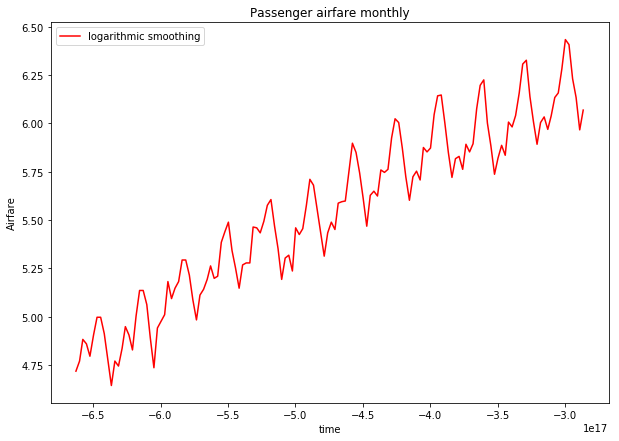

In [15]:
from numpy import log
log_values = log(series.values)
time_line = pd.date_range(start='1/1949',periods=len(series.values),freq='MS')
dates=time_line
result = adfuller(log_values)
print("AG Dicky Fuller hypothesis test results :")

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

fig = plt.figure(figsize=(10,7))
plt.xlabel('time')
plt.ylabel('Airfare')
plt.title("Passenger airfare monthly")

plt.plot(dates,log_values,'r',label='logarithmic smoothing')
plt.legend()
# plt.plot(dates,series.values)
plt.show()

# 1B- ARIMA:

In [16]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

C:\Anacounda\lib\site-packages\pandas\core\series.py:2849: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)
C:\Anacounda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Anacounda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
C:\Anacounda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: Futu

predicted=331.440333, expected=355.000000
predicted=369.462081, expected=422.000000
predicted=420.115237, expected=465.000000
predicted=473.199538, expected=467.000000
predicted=466.578029, expected=404.000000
predicted=371.025574, expected=347.000000
predicted=341.996629, expected=305.000000
predicted=308.828628, expected=336.000000
predicted=383.951197, expected=340.000000
predicted=350.854848, expected=318.000000
predicted=321.024663, expected=362.000000
predicted=372.647313, expected=348.000000
predicted=333.079689, expected=363.000000
predicted=382.751004, expected=435.000000
predicted=437.556612, expected=491.000000
predicted=505.721873, expected=505.000000
predicted=501.106136, expected=404.000000
predicted=348.463086, expected=359.000000
predicted=365.902584, expected=310.000000
predicted=306.445532, expected=337.000000
predicted=394.221976, expected=360.000000


C:\Anacounda\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=376.161571, expected=342.000000
predicted=342.233139, expected=406.000000
predicted=419.208639, expected=396.000000
predicted=377.410239, expected=420.000000
predicted=434.771516, expected=472.000000
predicted=463.847773, expected=548.000000
predicted=574.013533, expected=559.000000
predicted=547.756310, expected=463.000000
predicted=420.403721, expected=407.000000
predicted=396.715730, expected=362.000000
predicted=369.257691, expected=405.000000
predicted=463.104325, expected=417.000000
predicted=429.567253, expected=391.000000
predicted=385.538082, expected=419.000000
predicted=419.789806, expected=461.000000
predicted=472.012266, expected=472.000000
predicted=475.158951, expected=535.000000
predicted=546.071766, expected=622.000000
predicted=637.007634, expected=606.000000
predicted=586.858793, expected=508.000000
predicted=466.421598, expected=461.000000
predicted=456.629820, expected=390.000000
predicted=388.025100, expected=432.000000
Test MSE: 2136.438


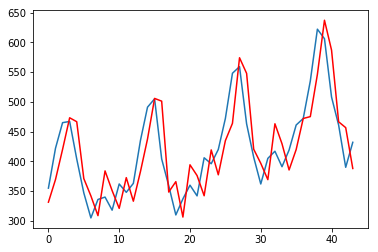

In [17]:
X = Series.from_csv('AirPassengers.csv', header=0)
X = X.values
X= np.array(X,dtype='d')
size = int(len(X) * 0.70)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,2,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

# 2 - Logistic Regression on the Olivetti faces dataset

In [18]:
from __future__ import print_function
from sklearn.model_selection import train_test_split
import tensorflow as tf
import sklearn.datasets as df
# Import Olivetti Faces data
data=df.fetch_olivetti_faces(data_home=None, shuffle=True, random_state=10, download_if_missing=True)
targets = data.target
X = data.data
X.shape
X_train, X_test, y_train, y_test = train_test_split(X, targets, test_size=0.10, random_state=42)

C:\Anacounda\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\Pedram's Machine\scikit_learn_data


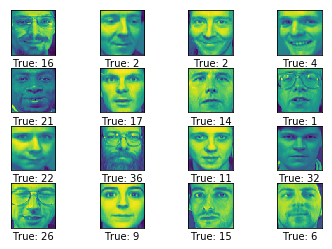

In [40]:
def plot_images(images, cls_true, cls_pred=None):
    assert len(images) == len(cls_true) == 40

    # Create figure with 3x3 sub-plots.
    fig, axes = plt.subplots(4, 4)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Plot image.
#         ax.imshow(images[i].reshape(img_shape), cmap='binary')
        ax.imshow(images[i].reshape(img_shape))
        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])

        ax.set_xlabel(xlabel)
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])

    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.

    plt.show()


# Get the first images from the test-set.
images = X_test

# Get the true classes for those images.
cls_true = y_test

img_size = 64
img_shape = (img_size, img_size)
img_size_flat = img_size * img_size

# Plot the images and labels using our helper-function above.
plot_images(images=images, cls_true=cls_true)

In [19]:
# Parameters
learning_rate = 0.01
training_epochs = 25
display_step = 1

In [20]:
# tf Graph Input
x = tf.placeholder(tf.float32, shape=(360, 4096)) # olivetti data image of shape 64*64=4096
y = tf.placeholder(tf.float32, shape=(360,)) #  Face recognition => 100 classes

In [21]:
# Set model weights
W = tf.Variable(tf.zeros([4096, 360]))
b = tf.Variable(tf.zeros([360]))

In [22]:
# Construct model
pred = tf.sigmoid(tf.matmul(x, W) + b) # Softmax

In [23]:
# Minimize error using cross entropy
cost = tf.reduce_mean(-(y*tf.log(pred)+(1+y)*tf.log(1-pred)))

In [24]:
# Gradient Descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [25]:
# Initialize the variables (i.e. assign their default value)
# init = tf.global_variables_initializer()
sess= tf.InteractiveSession()
tf.global_variables_initializer().run()
# Start training

In [26]:
# Training cycle
for epoch in range(training_epochs):
    idx = np.random.choice(len(X_train),replace=False)
        # Run optimization op (backprop) and cost op (to get loss value)
    _, c = sess.run([optimizer, cost], feed_dict={x: X_train,y: y_train})
        # Compute average loss
    
    # Display logs per epoch step
    if (epoch+1) % display_step == 0:
        print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c))

print("Optimization Finished!")

# Test model

Epoch: 0001 cost= 27.618331909
Epoch: 0002 cost= 27.610502243
Epoch: 0003 cost= 27.607051849
Epoch: 0004 cost= 27.604982376
Epoch: 0005 cost= 27.603807449
Epoch: 0006 cost= 27.602445602
Epoch: 0007 cost= 27.601100922
Epoch: 0008 cost= 27.600124359
Epoch: 0009 cost= 27.599594116
Epoch: 0010 cost= 27.598991394
Epoch: 0011 cost= 27.598352432
Epoch: 0012 cost= 27.597846985
Epoch: 0013 cost= 27.597295761
Epoch: 0014 cost= 27.596874237
Epoch: 0015 cost= 27.596424103
Epoch: 0016 cost= 27.596054077
Epoch: 0017 cost= 27.595760345
Epoch: 0018 cost= 27.595481873
Epoch: 0019 cost= 27.595174789
Epoch: 0020 cost= 27.594861984
Epoch: 0021 cost= 27.594509125
Epoch: 0022 cost= 27.594127655
Epoch: 0023 cost= 27.593826294
Epoch: 0024 cost= 27.593519211
Epoch: 0025 cost= 27.593248367
Optimization Finished!


In [27]:
# tf Graph Input
x = tf.placeholder(tf.float32, shape=(40, 4096)) # olivetti data image of shape 64*64=4096
y = tf.placeholder(tf.float32, shape=(40,)) #  Face recognition => 100 classes

In [28]:
# Set model weights
W = tf.Variable(tf.zeros([4096, 40]))
b = tf.Variable(tf.zeros([40]))
pred = tf.sigmoid(tf.matmul(x, W) + b) # Softmax
sess= tf.InteractiveSession()

In [32]:
print(pred)

Tensor("Sigmoid_1:0", shape=(40, 40), dtype=float32)


In [48]:
data_png=df.fetch_olivetti_faces
data_png
from sklearn import decomposition
n_row, n_col = 2, 3
n_components = n_row * n_col
image_shape = (64, 64)
rng = np.random.seed(0)

# #############################################################################
# Load faces data
dataset = df.fetch_olivetti_faces(shuffle=True, random_state=rng)
faces = dataset.data

n_samples, n_features = faces.shape

# global centering
faces_centered = faces - faces.mean(axis=0)

# local centering
faces_centered -= faces_centered.mean(axis=1).reshape(n_samples, -1)

print("Dataset consists of %d faces" % n_samples)


def plot_gallery(title, images, n_col=n_col, n_row=n_row):
    plt.figure(figsize=(2. * n_col, 2.26 * n_row))
    plt.suptitle(title, size=16)
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        vmax = max(comp.max(), -comp.min())
        plt.imshow(comp.reshape(image_shape), cmap=plt.cm.gray,
                   interpolation='nearest',
                   vmin=-vmax, vmax=vmax)
        plt.xticks(())
        plt.yticks(())
    plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.)

Dataset consists of 400 faces
